# Investment Value

As a FinTech professional, you will be using your Python and APIs coding skills to analyze financial data. In this activity, you will use the Alpaca SDK to calculate the present value of a stock portfolio.

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [33]:
# Set current amount of shares data
amt_shares = [200, 200, 200, 200, 200]

# Set the tickers
tickers = ['IVV', 'MSFT', 'FB', 'GOOG', 'AMZN']

# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(amt_shares, tickers)

df_shares.columns = ['shares']

# Display shares data
df_shares.head()

,shares
IVV,200
MSFT,200
FB,200
GOOG,200
AMZN,200


## Load and Verify Environment Variables

In [23]:
# Load .env environment variables
load_dotenv()

True

In [24]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_KEY')
alpaca_secret_key = os.getenv('ALPACA_KEY_SECRET')

In [25]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca key is {alpaca_api_key}")
print(f"Alpaca secret key is {alpaca_secret_key}")

Alpaca key is PKMWQL1LA14C1RK0ZTTC
Alpaca secret key is OnzURrqiO6snAtKkNF9K15QQQrQ4YTAi5w211ZhD


## Create the Alpaca API Object

In [26]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version=2)

## Set a variable `today` with current date using ISO format

In [27]:
# Format current date as ISO format
today = pd.Timestamp("2020-06-04", tz="America/New_York").isoformat()

## Set a variable `timeframe` with value equal to `1D`

In [28]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = '1D'

## Create a DataFrame with current price data for `MSFT` & `AAPL` using `alpaca.get_barset()`

In [38]:
# Get current price data for MSFT and AAPL
df_tickers = alpaca.get_barset(tickers, timeframe=timeframe, start=today, end=today).df

# Display sample data
df_tickers.head()

AMZN                                         FB  \
                              open     high      low   close   volume    open   
time                                                                            
2020-06-04 00:00:00-04:00  2477.43  2507.54  2450.01  2460.6  5957350  229.56   

                                                             ...     IVV  \
                             high     low   close    volume  ...    open   
time                                                         ...           
2020-06-04 00:00:00-04:00  231.63  224.61  226.29  15405418  ...  312.18   

                                                            MSFT          \
                             high     low  close   volume   open    high   
time                                                                       
2020-06-04 00:00:00-04:00  314.12  310.17  312.4  6515650  184.3  185.84   

                                                    
                             low   close    volume  
time                                                
2020-06-04 00:00:00-04:00  182.3  182.95  49455619  

[1 rows x 25 columns]

## Calculate the current value in dollars of the stock portfolio

In [37]:
# Fetch the current closing prices from the DataFrame
close_prices_df = pd.DataFrame()

close_prices_df['AMZN'] = df_tickers['AMZN']['close']
close_prices_df['FB'] = df_tickers['FB']['close']
close_prices_df['IVV'] = df_tickers['IVV']['close']
close_prices_df['MSFT'] = df_tickers['MSFT']['close']
close_prices_df['GOOG'] = df_tickers['GOOG']['close']

close_prices_df.index = close_prices_df.index.date

close_prices_df.head()

,AMZN,FB,IVV,MSFT,GOOG
2020-06-04,2460.6,226.29,312.4,182.95,1412.73


In [47]:
# Compute the current value in dollars of the stock portfolio
amzn_value = 200 * close_prices_df['AMZN'][0]
fb_value = 200 * close_prices_df['FB'][0]
ivv_value = 200 * close_prices_df['IVV'][0]
msft_value = 200 * close_prices_df['MSFT'][0]
goog_value = 200 * close_prices_df['GOOG'][0]

# Print the current value of the stocks portfolio
print(f"The current value of AMZN is ${amzn_value}. ")
print(f"The current value of FB is ${fb_value}. ")
print(f"The current value of IVV is ${ivv_value}. ")
print(f"The current value of MSFT is ${msft_value}. ")
print(f"The current value of GOOG is ${goog_value}. ")

The current value of AMZN is $492120.0. 
The current value of FB is $45258.0. 
The current value of IVV is $62479.99999999999. 
The current value of MSFT is $36590.0. 
The current value of GOOG is $282546.0. 


## Add current values to `df_shares`original DataFrame

In [48]:
# Add column `value` to `df_shares` to show current values of stocks
df_shares['value'] = [ivv_value, msft_value, fb_value, goog_value, amzn_value]
df_shares

,shares,value
IVV,200,62480.0
MSFT,200,36590.0
FB,200,45258.0
GOOG,200,282546.0
AMZN,200,492120.0


## Plot stock portfolio composition

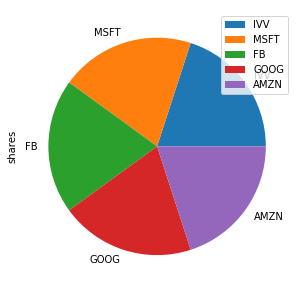

In [53]:
# Create a pie chart to show the proportion of stocks in the portfolio
plot = df_shares.plot.pie(y='shares', figsize=(15,5))

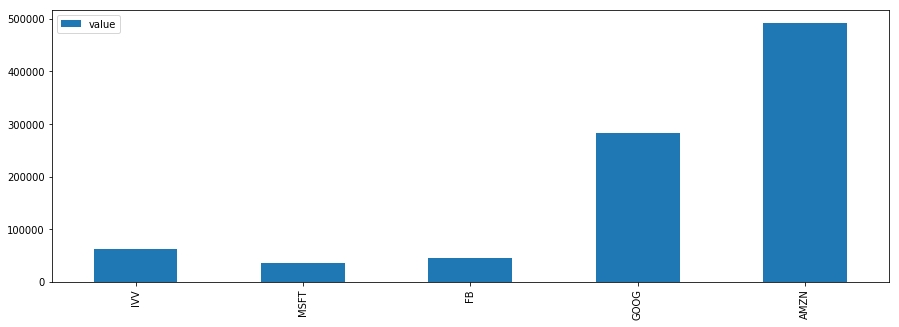

In [54]:
# Create a bar plot to show the value of shares
plot = df_shares.plot.bar(y='value', figsize=(15,5))